# Regression Project: Predicting house price in bengalore

We will start by importing the libraries that would help us in this project


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sms
import sklearn.linear_model as slm
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\Bhuvnesh's PC\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#df.info()

In [4]:
df.drop(["availability","society"],axis='columns',inplace=True)

In [5]:
df.dropna(subset=['location','size','bath','balcony'],inplace=True)

In [6]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [8]:
df['size(BHK)']=df['size'].apply(lambda x: x.split()[0])

In [9]:
df.drop('size',axis='columns',inplace=True)

In [10]:
def location1(x):
    y=x.split()
    if len(y)>4:
        return y[-4]+' '+y[-3]+' '+y[-2]+' '+y[-4]
    else :
        return x

In [11]:
df['location']=df['location'].apply(lambda x: location1(x))


In [12]:
def getmean(x):
    
    for i in x:
        y=x.split('-')
        if len(y)==2:
            return ((float(y[0])+float(y[1]))/2)
        else :
            return (y[0])
              

In [13]:
df2=df.copy()

In [14]:
df2['total_sqft']=df2['total_sqft'].apply(lambda x: getmean(x))

In [15]:
def sep(x):
    if str(x).isnumeric():
        return x
    else:
        h = '' 
        for i in str(x):
            if i.isnumeric():  
                h += i  
        if "M" in str(x):
            return int(h) * 10.76  
        elif "Y" in str(x) or 'y' in str(x):
            return int(h) * 9 


In [16]:
df2['total_sqft']=df2['total_sqft'].apply(lambda x: sep(x))  

In [17]:
def replace(x):
    if str(x).isnumeric():
        pass
    else:
        return np.nan()

In [18]:
#df2['total_sqft'].apply(lambda x: replace(x))

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df2[~df2['total_sqft'].apply(lambda x: is_float(x))]

,area_type,location,total_sqft,bath,balcony,price,size(BHK)
30,Super built-up Area,Yelahanka,None,4.0,0.0,186.000,4
44,Super built-up Area,Kanakpura Road,None,2.0,2.0,91.790,2
122,Super built-up Area,Hebbal,None,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,None,2.0,0.0,54.005,2
142,Super built-up Area,Kasavanhalli,None,3.0,1.0,105.000,3
...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,None,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,None,2.0,0.0,72.760,2
13123,Super built-up Area,9th Phase JP Nagar,None,2.0,2.0,69.000,2
13265,Super built-up Area,Hoodi,None,2.0,0.0,59.135,2


In [21]:
df2.dropna(subset=['total_sqft'],inplace=True)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12467 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12467 non-null  object 
 1   location    12467 non-null  object 
 2   total_sqft  12467 non-null  object 
 3   bath        12467 non-null  float64
 4   balcony     12467 non-null  float64
 5   price       12467 non-null  float64
 6   size(BHK)   12467 non-null  object 
dtypes: float64(3), object(4)
memory usage: 779.2+ KB


In [23]:
df2['price_sq_ft']=(df2['price']*100000)/df2['total_sqft'].astype(float)

In [24]:
len(df2['location'].unique())

1258

In [25]:
df2['location']=df2['location'].apply(lambda x: location1(x))


In [26]:
loc_agg=df2.groupby('location')['location'].agg('count')
loc_agg

location
 Anekal                           1
 Banaswadi                        1
 Basavangudi                      1
 Bhoganhalli                      1
 Devarabeesana Halli              6
                                 ..
t.c palya                         1
tc.palya                          4
township, off hennur township,    1
vinayakanagar                     1
whitefiled                        1
Name: location, Length: 1258, dtype: int64

In [27]:
loc=loc_agg[loc_agg<8]

In [28]:
df2['location']=df2['location'].apply(lambda x: 'other' if x in loc else x )

In [29]:
len(df2['location'].unique())

293

In [52]:
df2

,area_type,location,total_sqft,bath,balcony,price,size(BHK),price_sq_ft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4,10407.336319


# Outlier Removal

Text(0, 0.5, 'BHK')

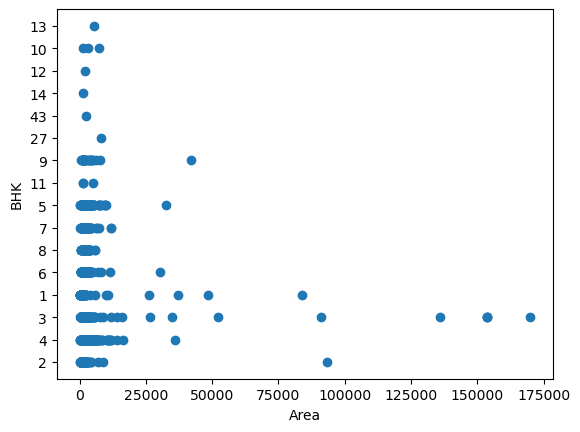

In [51]:
plt.scatter(df2.total_sqft.astype('int'),df2['size(BHK)'])
plt.xlabel('Area')
plt.ylabel('BHK')

In [30]:
df3=df2[df2.total_sqft.astype('float')/df2['size(BHK)'].astype('int')>300]

In [31]:
df3

,area_type,location,total_sqft,bath,balcony,price,size(BHK),price_sq_ft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4,10407.336319


In [41]:
def out_per_loc(x):
    df=pd.DataFrame()
    for key,subdf in x.groupby('location'):
        #print(key,subdf)
        low_limit=np.mean(subdf.price_sq_ft)-2*np.std(subdf.price_sq_ft)
        upp_limit=np.mean(subdf.price_sq_ft)+2*np.std(subdf.price_sq_ft)
        red_df=subdf[(subdf.price_sq_ft>low_limit) & (subdf.price_sq_ft<upp_limit)]
        df=pd.concat([df,red_df],ignore_index=True)
    return df
        

In [43]:
df4=out_per_loc(df3)
df4

,area_type,location,total_sqft,bath,balcony,price,size(BHK),price_sq_ft
0,Super built-up Area,Devarachikkanahalli,1250,2.0,3.0,44.00,3,3520.000000
1,Super built-up Area,Devarachikkanahalli,1250,2.0,2.0,40.00,2,3200.000000
2,Plot Area,Devarachikkanahalli,1200,2.0,2.0,83.00,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,1170,2.0,2.0,40.00,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,1425,2.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...,...
11137,Super built-up Area,other,1095,2.0,1.0,57.00,2,5205.479452
11138,Super built-up Area,other,1353,2.0,2.0,110.00,2,8130.081301
11139,Plot Area,other,812,1.0,0.0,26.00,1,3201.970443
11140,Super built-up Area,other,1440,2.0,2.0,63.93,3,4439.583333


Text(0, 0.5, 'BHK')

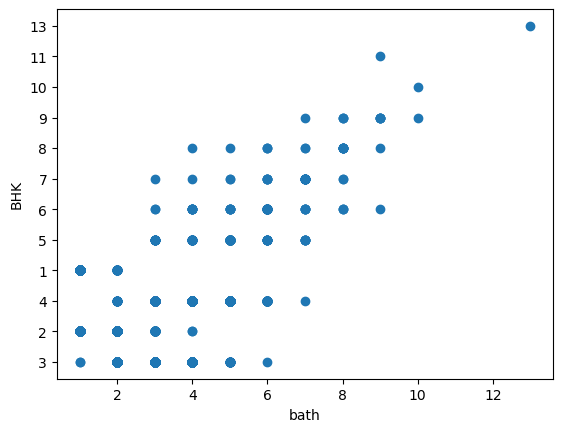

In [54]:
plt.scatter(df4.bath,df4['size(BHK)'])
plt.xlabel('bath')
plt.ylabel('BHK')

In [67]:
df5=df4[df4.bath.astype('int')<=df4['size(BHK)'].astype('int')+2]

Text(0, 0.5, 'BHK')

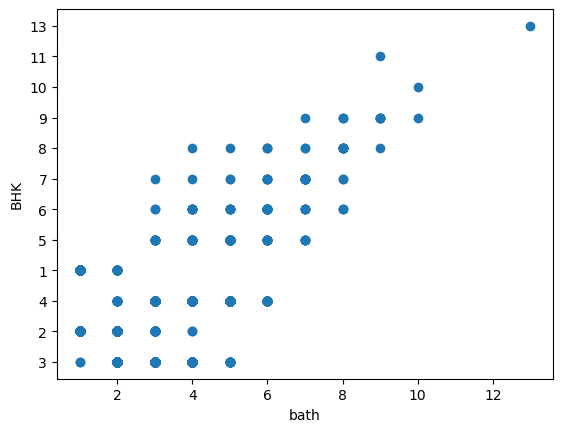

In [68]:
plt.scatter(df5.bath,df5['size(BHK)'])
plt.xlabel('bath')
plt.ylabel('BHK')

In [69]:
df5

,area_type,location,total_sqft,bath,balcony,price,size(BHK),price_sq_ft
0,Super built-up Area,Devarachikkanahalli,1250,2.0,3.0,44.00,3,3520.000000
1,Super built-up Area,Devarachikkanahalli,1250,2.0,2.0,40.00,2,3200.000000
2,Plot Area,Devarachikkanahalli,1200,2.0,2.0,83.00,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,1170,2.0,2.0,40.00,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,1425,2.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...,...
11137,Super built-up Area,other,1095,2.0,1.0,57.00,2,5205.479452
11138,Super built-up Area,other,1353,2.0,2.0,110.00,2,8130.081301
11139,Plot Area,other,812,1.0,0.0,26.00,1,3201.970443
11140,Super built-up Area,other,1440,2.0,2.0,63.93,3,4439.583333


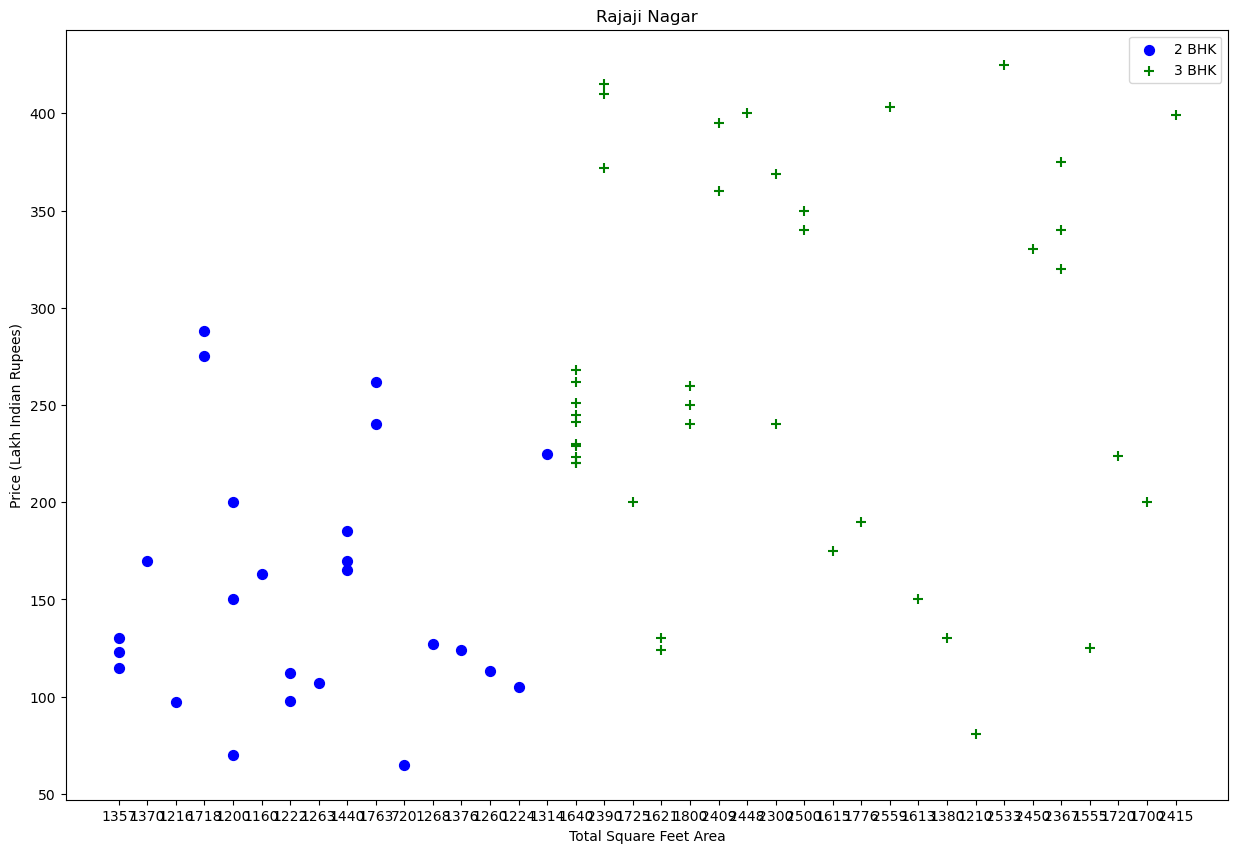

In [80]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df['size(BHK)'].astype('int')==2)]
    bhk3 = df[(df.location==location) & (df['size(BHK)'].astype('int')==3)]
    
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

In [86]:
df5['bhk']=df5['size(BHK)'].astype('int')

C:\Users\Bhuvnesh's PC\AppData\Local\Temp\ipykernel_8628\1075807815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['bhk']=df5['size(BHK)'].astype('int')


In [87]:
df5

,area_type,location,total_sqft,bath,balcony,price,size(BHK),price_sq_ft,bhk
0,Super built-up Area,Devarachikkanahalli,1250,2.0,3.0,44.00,3,3520.000000,3
1,Super built-up Area,Devarachikkanahalli,1250,2.0,2.0,40.00,2,3200.000000,2
2,Plot Area,Devarachikkanahalli,1200,2.0,2.0,83.00,2,6916.666667,2
3,Super built-up Area,Devarachikkanahalli,1170,2.0,2.0,40.00,2,3418.803419,2
4,Super built-up Area,Devarachikkanahalli,1425,2.0,2.0,65.00,3,4561.403509,3
...,...,...,...,...,...,...,...,...,...
11137,Super built-up Area,other,1095,2.0,1.0,57.00,2,5205.479452,2
11138,Super built-up Area,other,1353,2.0,2.0,110.00,2,8130.081301,2
11139,Plot Area,other,812,1.0,0.0,26.00,1,3201.970443,1
11140,Super built-up Area,other,1440,2.0,2.0,63.93,3,4439.583333,3


In [89]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sq_ft),
                'std': np.std(bhk_df.price_sq_ft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sq_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(8104, 9)

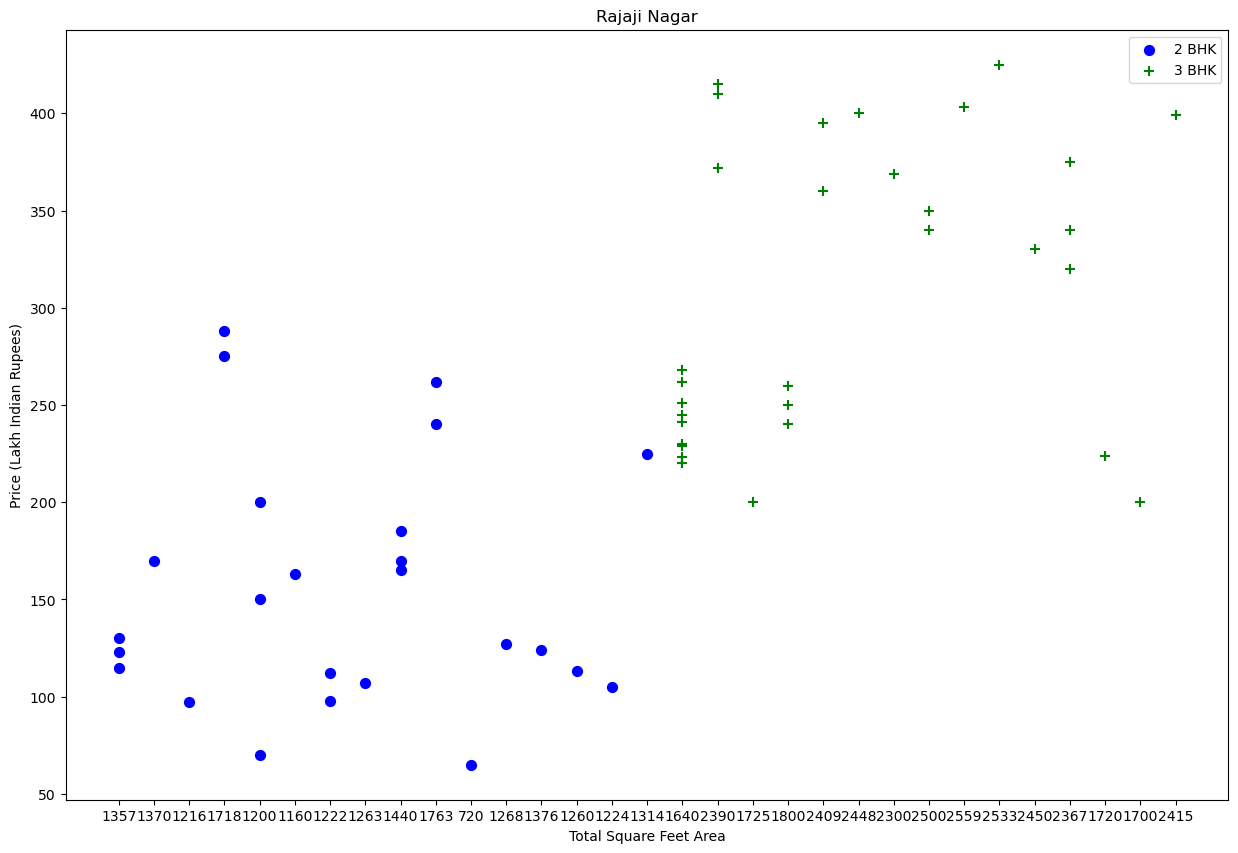

In [90]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df['size(BHK)'].astype('int')==2)]
    bhk3 = df[(df.location==location) & (df['size(BHK)'].astype('int')==3)]
    
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

In [91]:
dummies=pd.get_dummies(df6.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df7=pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')

In [98]:
df7.head(10)

,area_type,location,total_sqft,bath,balcony,price,size(BHK),price_sq_ft,bhk,Devarachikkanahalli,...,Vishwanatha Nagenahalli,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,Devarachikkanahalli,1250,2.0,2.0,40.0,2,3200.000000,2,1,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,Devarachikkanahalli,1200,2.0,2.0,83.0,2,6916.666667,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Devarachikkanahalli,1170,2.0,2.0,40.0,2,3418.803419,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Devarachikkanahalli,1425,2.0,2.0,65.0,3,4561.403509,3,1,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,Devarachikkanahalli,947,2.0,2.0,43.0,2,4540.654699,2,1,...,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,Devarachikkanahalli,1130,2.0,2.0,36.0,2,3185.840708,2,1,...,0,0,0,0,0,0,0,0,0,0
7,Super built-up Area,Devarachikkanahalli,1417,2.0,2.0,76.0,3,5363.443896,3,1,...,0,0,0,0,0,0,0,0,0,0
8,Super built-up Area,Devarachikkanahalli,1230,2.0,1.0,58.0,2,4715.447154,2,1,...,0,0,0,0,0,0,0,0,0,0
9,Super built-up Area,Devarachikkanahalli,1705,3.0,2.0,75.0,3,4398.826979,3,1,...,0,0,0,0,0,0,0,0,0,0
10,Built-up Area,Devarachikkanahalli,1116,2.0,1.0,47.0,2,4211.469534,2,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df8=df7.drop(['location','price_sq_ft'],axis='columns')

In [114]:
x=df8.drop(['price','size(BHK)'],axis='columns')

In [115]:
y=df8.price

In [119]:
label_encoder=LabelEncoder()
x.area_type=label_encoder.fit_transform(x.area_type)

In [120]:
x

,area_type,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,...,Vishwanatha Nagenahalli,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,3,1250,2.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200,2.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1170,2.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425,2.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,947,2.0,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,3,1800,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11135,2,2000,2.0,2.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11136,0,1140,1.0,1.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11138,3,1353,2.0,2.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
print(x.shape)
print(y.shape)

(8104, 297)
(8104,)


In [147]:
x2_train=x_train.drop('area_type',axis='columns')


In [149]:
x2_train,x2_test,y2_train,y2_test = sms.train_test_split(x,y,test_size = 0.2,random_state = 10)

In [148]:
x2_train

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Vishwanatha Nagenahalli,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
516,1151,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,1654,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9300,1200,2.0,0.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10356,4800,5.0,2.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,1420,2.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,2086,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,1410,2.0,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5706,480,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9422,2400,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
#x2_train=x_train.drop('area_type',axis='columns')
x2_train

,area_type,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,...,Vishwanatha Nagenahalli,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
516,3,1151,2.0,1.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,3,1654,3.0,2.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9300,2,1200,2.0,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10356,2,4800,5.0,2.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,1420,2.0,1.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,3,2086,3.0,2.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,0,1410,2.0,0.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5706,3,480,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9422,0,2400,3.0,2.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
x2_test

,area_type,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,...,Vishwanatha Nagenahalli,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
7695,3,2050,3.0,1.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2046,0,1370,2.0,2.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8006,3,1586,3.0,1.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1312,0,960,2.0,2.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,3,1141,2.0,1.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,3,1308,2.0,2.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8344,3,1450,3.0,0.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6949,3,2500,4.0,2.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7234,3,1691,3.0,3.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
model=slm.LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5362818584282625